## CPLEX example

In [1]:
from optiwindnet.importer import load_repository
from optiwindnet.svg import svgplot
from optiwindnet.mesh import make_planar_embedding
from optiwindnet.interarraylib import G_from_S
from optiwindnet.heuristics import EW_presolver
from optiwindnet.MILP import solver_factory, ModelOptions

### Initialize Race Bank 2

In [2]:
locations = load_repository()

In [3]:
L = locations.race
capacity = 5

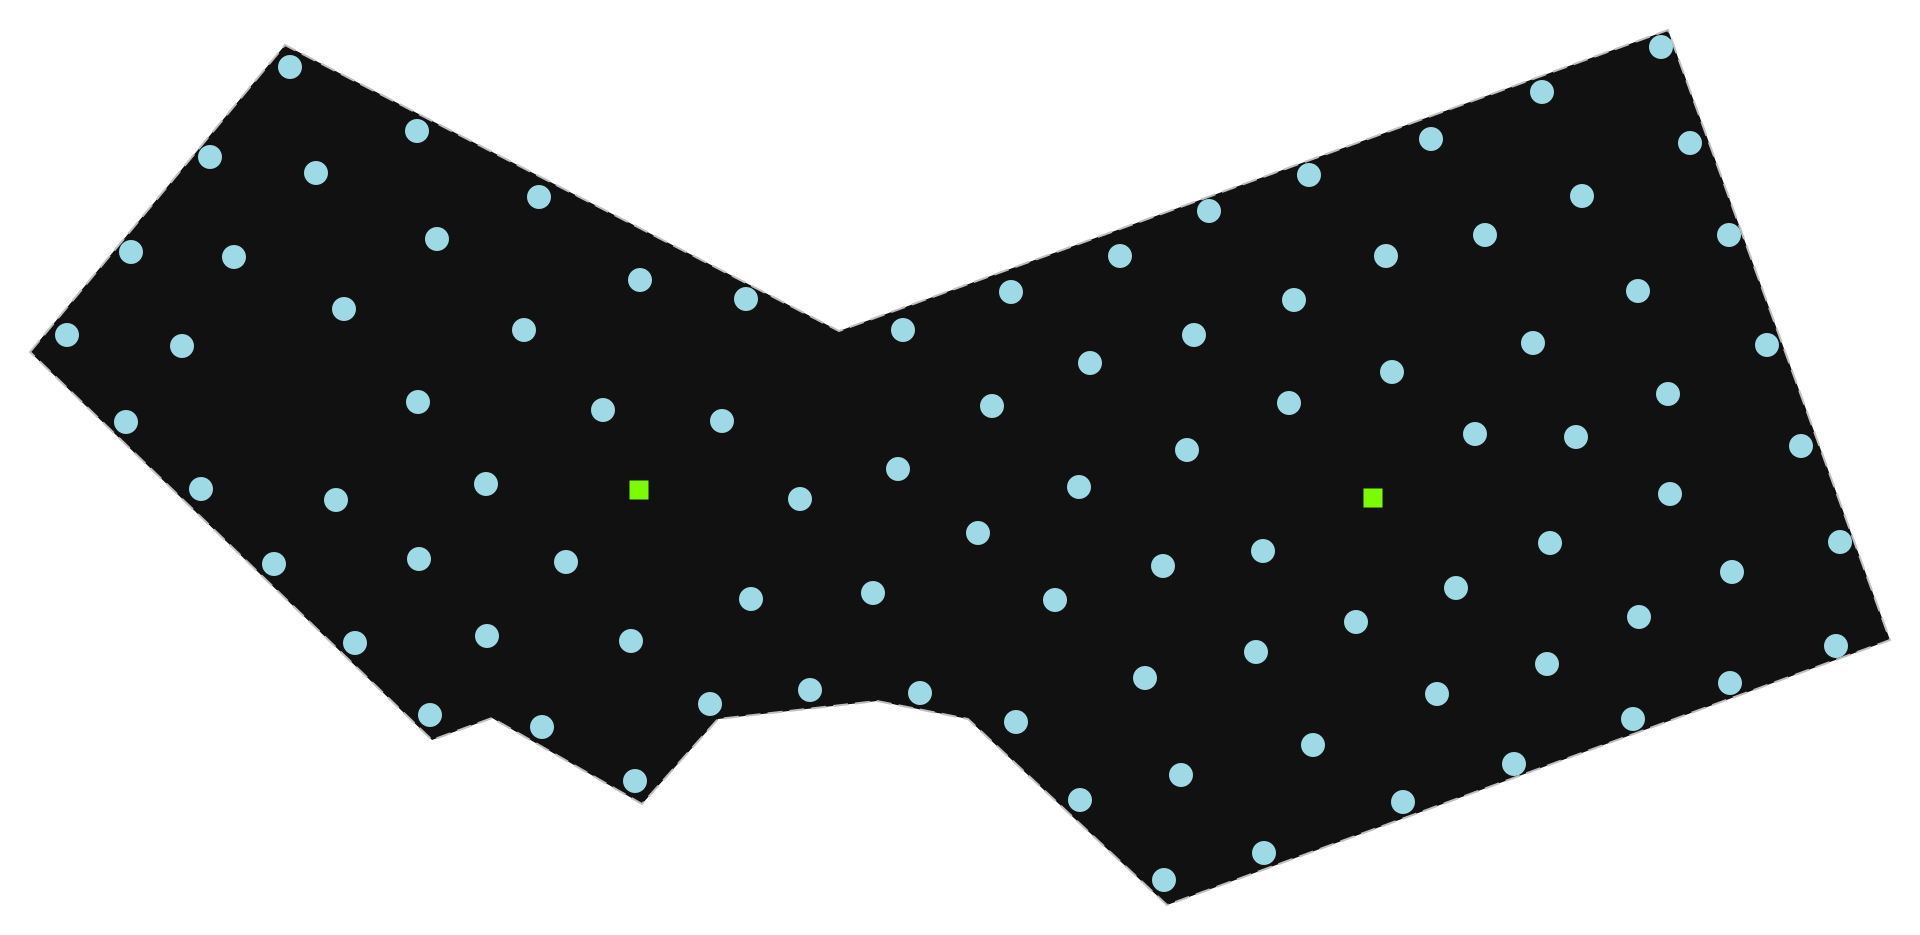

In [4]:
svgplot(L)

### Optimize Race Bank 2

In [5]:
P, A = make_planar_embedding(L)

Initial heuristic solution to warm-start the solver:

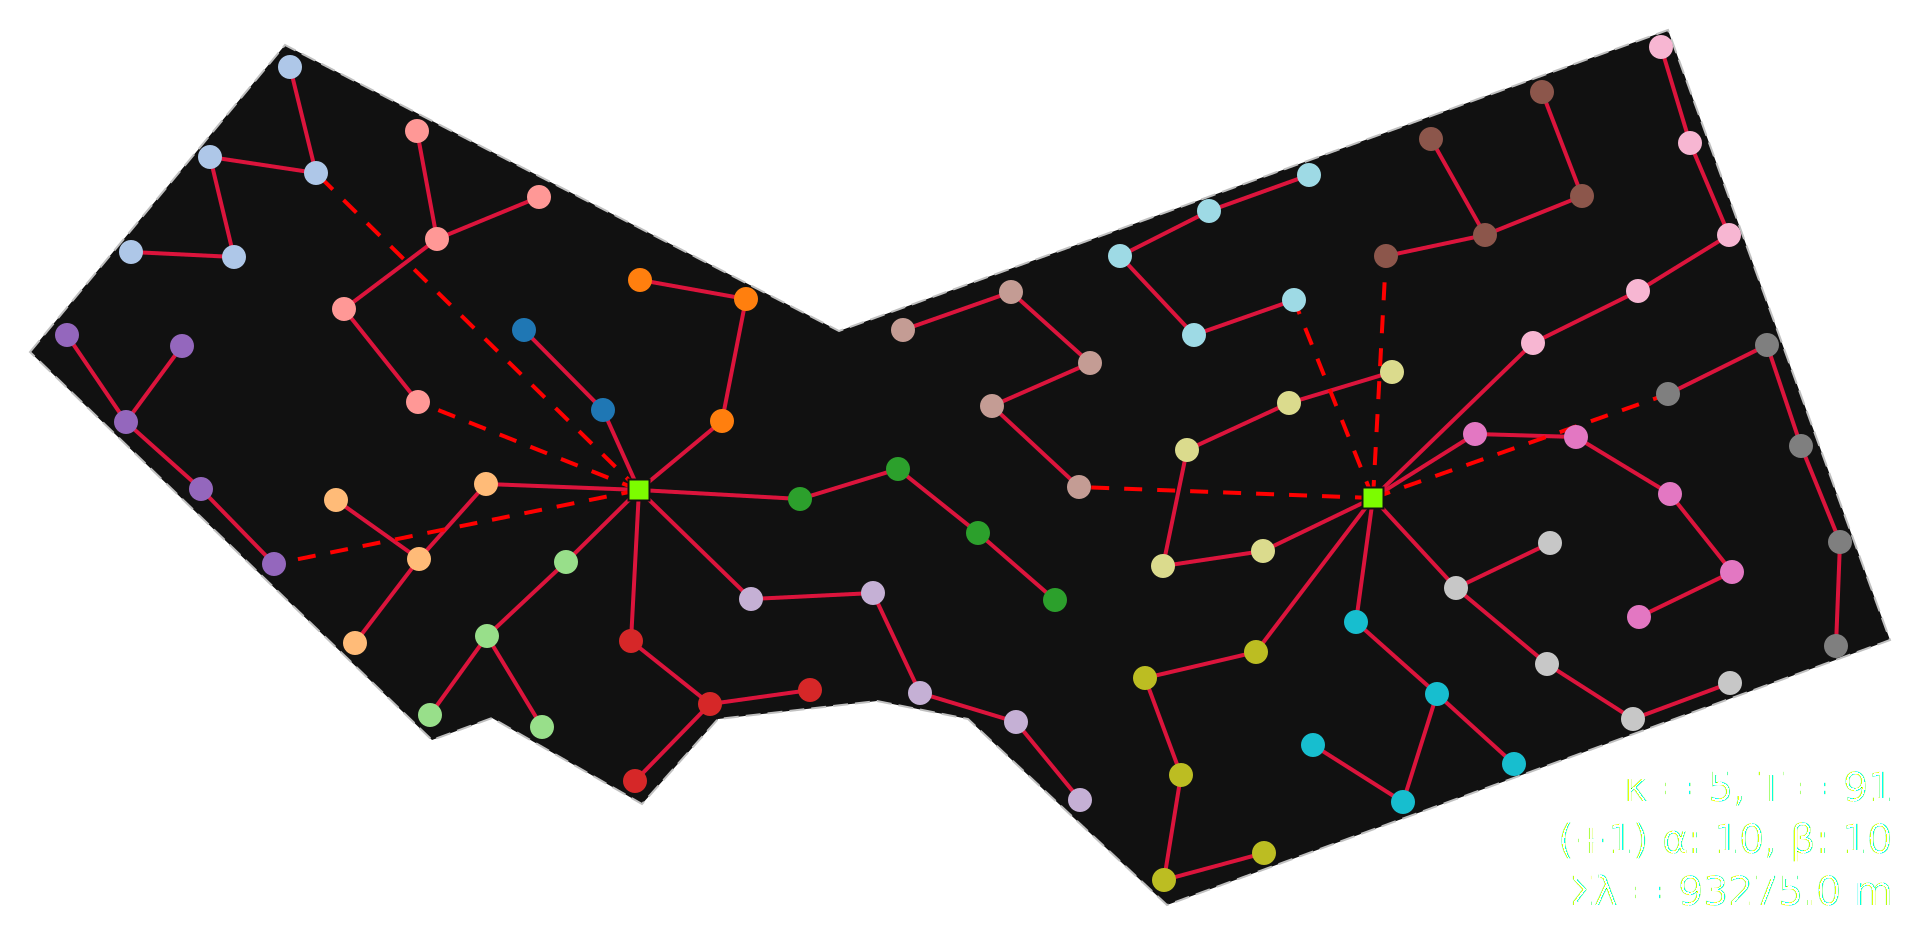

In [6]:
Sʹ = EW_presolver(A, capacity=capacity)
Gʹ = G_from_S(Sʹ, A)
svgplot(Gʹ)

In [7]:
solver = solver_factory('cplex')

In [8]:
solver.set_problem(
    P, A,
    capacity=Sʹ.graph['capacity'],
    model_options=ModelOptions(
        topology="branched",
        feeder_route="segmented",
        feeder_limit="unlimited",
    ),
    warmstart=Sʹ,
)

In [9]:
solver.solve(
    mip_gap=0.002,
    time_limit=20,
    verbose=True,
)

Version identifier: 22.1.2.0 | 2024-11-25 | 0edbb82fd
CPXPARAM_Read_DataCheck                          1
CPXPARAM_Parallel                                -1
CPXPARAM_Emphasis_MIP                            4
CPXPARAM_TimeLimit                               20
CPXPARAM_MIP_Tolerances_MIPGap                   0.002
1 of 1 MIP starts provided solutions.
MIP start 'm1' defined initial solution with objective 93274.5215.
Tried aggregator 1 time.
MIP Presolve eliminated 368 rows and 0 columns.
MIP Presolve modified 1040 coefficients.
Reduced MIP has 2740 rows, 2080 columns, and 9890 nonzeros.
Reduced MIP has 1040 binaries, 1040 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (7.87 ticks)
Probing time = 0.01 sec. (2.90 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 2740 rows, 2080 columns, and 9890 nonzeros.
Reduced MIP has 1040 binaries, 1040 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (6.22 ticks)
Probing time = 0.02 sec. (2.83 ticks)

SolutionInfo(runtime=13.05971646308899, bound=87628.45738695332, objective=87802.98827587758, relgap=0.001987755682937409, termination='optimal')

In [10]:
S, G = solver.get_solution()

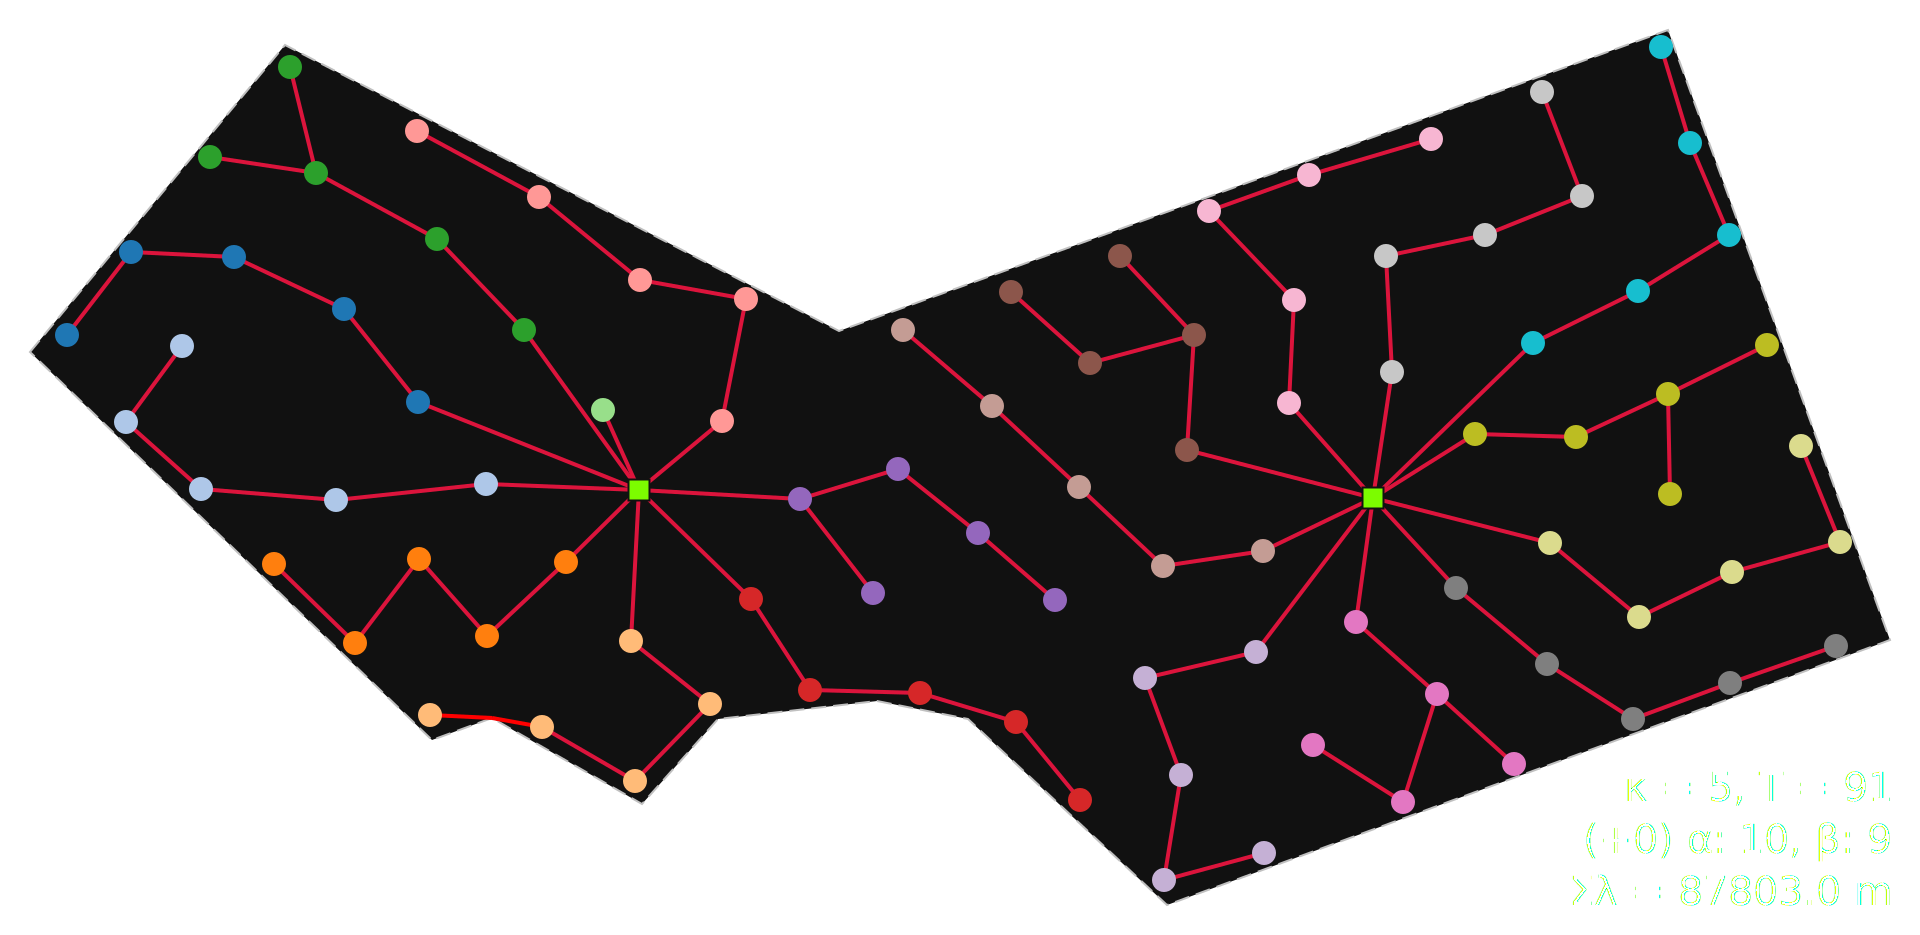

In [11]:
svgplot(G)